In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
titanic = sns.load_dataset('titanic')

In [199]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [201]:
# titanic.isnull().sum()
# titanic.nunique()
titanic = titanic.drop(['pclass', 'sibsp', 'parch', 'embarked', 'who', 'deck', 'embark_town', 'adult_male', 'alive', 'alone'], axis = 1)

In [203]:
titanic.head()

,survived,sex,age,fare,class
0,0,male,22.0,7.2500,Third
1,1,female,38.0,71.2833,First
2,1,female,26.0,7.9250,Third
3,1,female,35.0,53.1000,First
4,0,male,35.0,8.0500,Third


Text(0.5, 1.0, 'survival count by sex')

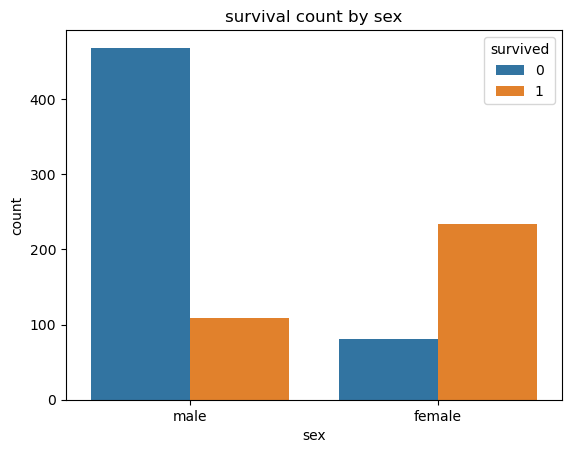

In [205]:
sns.countplot(x = 'sex', hue = 'survived', data = titanic)
plt.title('survival count by sex')

In [207]:
df = titanic
# df.columns
df.isnull().sum()
# sns.countplot(data =df, x = df['age'].isnull(), hue = 'sex')



survived      0
sex           0
age         177
fare          0
class         0
dtype: int64

In [209]:
# since, this data contain few null value in age column, and most of the age belong to 20-35
# i will replace the null value with median of age
age_median = df['age'].median()

df['age'] = df['age'].fillna(age_median)

In [211]:
df.isnull().sum()

survived    0
sex         0
age         0
fare        0
class       0
dtype: int64

In [263]:
# lets do the label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['class'] = le.fit_transform(df['class'])

#note:
# for class:
# first -> 0, second->1, third->2

# for gender:
# male->1, female->0

In [265]:
df.head()

,survived,sex,age,fare,class
0,0,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,1,0,26.0,7.9250,2
3,1,0,35.0,53.1000,0
4,0,1,35.0,8.0500,2


In [267]:
X = df.drop(['survived'], axis = 1)
y = df.iloc[:, 0]

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [271]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = clf.predict(X_test)
accuracy = accuracy_score(y_predict, y_test)

print(f" the accuracy is : {accuracy}")

 the accuracy is : 0.7430167597765364


In [297]:
# lets do the prediction 
new_data = pd.DataFrame({
    'sex' : [0],
    'age' : [25],
    'fare' : [100],
    'class' : [1]
})

In [301]:
survival_prediction = clf.predict(new_data)
cm = confusion_matrix(y_predict, y_test)

if(survival_prediction == 0):
    print("the passenger not survived")
else:
    print("the passenger will survived")

print(f"confusion matrix:")
print(cm)

the passenger not survived
confusion matrix:
[[80 21]
 [25 53]]
